In [67]:
import numpy as np
import pandas as pd
import math
import t_closeness
import matplotlib.pyplot as plt

In [2]:
Lab2_Data = pd.read_csv("Lab2.csv")

In [3]:
Lab2_Data[Lab2_Data['Household_Income'] == 15]

,Subject_ID,Gender,Age,Marital_Status,Country_Birth,Race,Household_Income,Alcohol_12_or_More_Ever,Alcohol_Average,EverUsed_Cocaine_Heroin_OR_Methamphetamine
8,83752,2,30,6,1,2,15,NaN,2,2
14,83785,2,60,3,1,2,15,1.0,1,2
17,83812,2,68,1,1,1,15,NaN,2,2
20,83817,1,42,1,1,3,15,NaN,1,2
22,83829,1,50,1,2,6,15,NaN,1,2
29,83857,2,31,1,1,3,15,NaN,3,2
30,83860,1,41,1,1,4,15,NaN,3,1
43,83902,1,49,1,1,3,15,NaN,1,2
50,83946,1,43,1,1,3,15,NaN,5,2
53,83953,2,46,1,1,1,15,NaN,5,2


In [5]:
# Generalizations:
# 'Age'
# 40 = less than 40, 70 = btwn 40 and 70
max_age = 69
min_age = 20
A_0 = {}
A_1 = {}
for age in range(min_age, max_age+1):
    A_0[age] = age
    if age < 40:
        A_1[age] = 40
    else:
        A_1[age] = 70

# 'Marital_Status'
# 0 = not married, 1 = married
M_0 = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
M_1 = {1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0}

# 'Country_Birth'
# 0 = Some Country
CB_0 = {1: 1, 2: 2}
CB_1 = {1: 0, 2: 0}

# 'Race'
# 0 = Hispanic
# 9 = non-Hispanic
R_0 = {1: 1, 2: 2, 3: 3, 4: 4, 6: 6, 7: 7}
R_1 = {1: 0, 2: 0, 3: 9, 4: 9, 6: 9, 7: 9}

# 'Household_Income'
# 0 = 20000-, 21 = 20000 - 45000, 22 = 45000 - 75000, 23 = 75000+, 24 = other
# 25 = 20000+
# I_0 = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 12: 12, 13: 13, 14: 14, 15: 15}
# I_1 = {1: 0, 2: 0, 3: 0, 4: 0, 5: 21, 6: 21, 7: 21, 8: 22, 9: 22, 10: 22, 12: 24, 13: 0, 14: 23, 15: 23}
# I_2 = {1: 0, 2: 0, 3: 0, 4: 0, 5: 25, 6: 25, 7: 25, 8: 25, 9: 25, 10: 25, 12: 25, 13: 0, 14: 25, 15: 25}


# Domain Generalization Nodes Try 2
class Level:
    def __init__(self, height, attribute, generalization):
        self.height = height
        self.attribute = attribute
        self.generalization = generalization
        self.parent = None
        self.children = []
        
    def set_parent(self, level):
        level.children.append(self)
        self.parent = level

        
A_level_0 = Level(0, 'Age', A_0)
A_level_1 = Level(1, 'Age', A_1)
A_level_0.set_parent(A_level_1)

M_level_0 = Level(0, 'Marital_Status', M_0)
M_level_1 = Level(1, 'Marital_Status', M_1)
M_level_0.set_parent(M_level_1)

CB_level_0 = Level(0, 'Country_Birth', CB_0)
CB_level_1 = Level(1, 'Country_Birth', CB_1)
CB_level_0.set_parent(CB_level_1)

R_level_0 = Level(0, 'Race', R_0)
R_level_1 = Level(1, 'Race', R_1)
R_level_0.set_parent(R_level_1)

# I_level_0 = Level(0, 'Household_Income', I_0)
# I_level_1 = Level(1, 'Household_Income', I_1)
# I_level_0.set_parent(I_level_1)
# I_level_2 = Level(2, 'Household_Income', I_2)
# I_level_1.set_parent(I_level_2)

In [6]:
class Node:
    def __init__(self, levels):
        self.levels = levels
        self.t_close = False
        
    def __repr__(self):
        out = ""
        for level in self.levels:
            out += str(level.height) + "   "
        return out[:-3]

In [7]:
base_node = Node([A_level_0, M_level_0, CB_level_0, R_level_0])

In [8]:
def generate_next(node):
    levels = node.levels
    next_nodes = []
    for l in levels:
        if l.parent != None:
            next_levels = []
            for l2 in levels:
                if l2 == l:
                    next_levels.append(l2.parent)
                else:
                    next_levels.append(l2)
            next_nodes.append(Node(next_levels))
    
    return next_nodes


def generalize_table(table, generalizations):
    gen_table = table.copy()
    for i, row in gen_table.iterrows():
        for attr, gen in generalizations.items():
            cur_value = row[gen_table.columns.get_loc(attr)]
            next_value = 0
            if not math.isnan(cur_value):
                next_value = gen[int(cur_value)]
            gen_table.iloc[i, gen_table.columns.get_loc(attr)] = next_value
    
    return gen_table


def incognito(table, base_node, distance_metric):
    q = [base_node]
    final_generalizations = []
    seen = {}
    while q != []:
        node = q.pop(0)
        node_repr = node.__repr__()
        
        if seen.get(node_repr) == None:
            generalizations = {}
            for level in node.levels:
                generalizations[level.attribute] = level.generalization


            gen_table = generalize_table(table, generalizations)
            ground_distance = distance_metric(gen_table, ['Gender', 'Age', 'Marital_Status', 'Country_Birth', 'Race'], 
                                          ['Household_Income'])

            final_generalizations.append([ground_distance, node])

            next_nodes = generate_next(node)
            q += next_nodes
            seen[node_repr] = True
        
    return final_generalizations

In [111]:
# incognito pseudocode:
    
# INPUT: data_table, base_generalization, distance_metric, T
# OUTPUT: valid_generalizations
# METHOD modified_incognito:
#     queue = initialize empty queue
#     add base generalization to queue
    
#     seen = []
#     valid_generalizations = []
    
#     while queue is not empty:
#         G = pop head of queue
#         if G has not been seen yet:
#             new_table = generalize_table(G, data_table)
#             ground_distance = distance_metric(new_table)
            
#             if ground_distance <= T:
#                 add to valid_generalizations
            
#             add to queue: generate_next(G)
#             mark G in seen

In [9]:
final_generalizations_EMD = incognito(Lab2_Data, base_node, t_closeness.EMD_ordered_distance)

In [10]:
### Run incognito for each t value, for each distance metric
final_generalizations_divergence = incognito(Lab2_Data, base_node, t_closeness.divergence)

In [11]:
final_generalizations_pearson = incognito(Lab2_Data, base_node, t_closeness.pearson)

In [12]:
final_generalizations_sjsd = incognito(Lab2_Data, base_node, t_closeness.sjsd)

In [13]:
final_generalizations_bhattacharyya = incognito(Lab2_Data, base_node, t_closeness.bhattacharyya)

In [14]:
final_generalizations_hellinger = incognito(Lab2_Data, base_node, t_closeness.hellinger)

In [15]:
final_generalizations_klDivergence = incognito(Lab2_Data, base_node, t_closeness.klDivergence)

In [16]:
final_generalizations_totalVariationDistance = incognito(Lab2_Data, base_node, t_closeness.totalVariationDistance)

In [101]:
### Choose t values
generalization_scores = [final_generalizations_EMD, final_generalizations_divergence, 
                         final_generalizations_pearson, final_generalizations_sjsd, 
                         final_generalizations_bhattacharyya, final_generalizations_hellinger, 
                         final_generalizations_klDivergence, final_generalizations_totalVariationDistance]


t_values = [0.5, 0.55, 0.6, 0.65, 0.7, 0.8, 0.9, 1.2, 1.5, 2.0]

In [102]:
gens = {}
for t in t_values:
    gens[t] = []

for desired_t in t_values:
    for metric in generalization_scores:
        good_t_vals = []
        for score in metric:
            t = score[0]
            gen = score[1]

            if t < desired_t:
                good_t_vals.append(score)
        
        gens[desired_t].append(good_t_vals)

In [107]:
### Range of each distance metric within our generalization domain
generalization_scores

for metric in generalization_scores:
    min_t = min(metric, key=lambda x: x[0])
    max_t = max(metric, key=lambda x: x[0])

    print(min_t, max_t, "\n")


[0.1857747034437359, 1   1   1   1] [0.6137467314157639, 0   0   0   0] 

[1.817229312551004, 1   1   1   1] [2.5509081535485607, 1   1   1   0] 

[0.656927226883494, 1   1   1   1] [2.4894157137109145, 1   0   1   1] 

[0.9306897629139712, 0   0   0   0] [1.0194527957343866, 1   1   1   1] 

[0.10661923419466404, 1   1   1   1] [2.336788109326076, 0   0   0   0] 

[0.07753936043929802, 1   1   1   1] [0.48547160423507946, 0   0   0   0] 

[0.1185883653153176, 0   0   0   0] [0.5394632163810728, 1   0   1   1] 

[0.10046582736927519, 1   1   1   1] [0.39185655584609635, 0   0   0   0] 



In [108]:
generalization_scores

[[[0.6137467314157639, 0   0   0   0],
  [0.6137467314157639, 1   0   0   0],
  [0.6137467314157639, 0   1   0   0],
  [0.6137467314157639, 0   0   1   0],
  [0.6137467314157639, 0   0   0   1],
  [0.38625326858423603, 1   1   0   0],
  [0.5404442401080428, 1   0   1   0],
  [0.6137467314157639, 1   0   0   1],
  [0.6137467314157639, 0   1   1   0],
  [0.6137467314157639, 0   1   0   1],
  [0.6137467314157639, 0   0   1   1],
  [0.25582885549265827, 1   1   1   0],
  [0.2086185262875588, 1   1   0   1],
  [0.4214390391080717, 1   0   1   1],
  [0.6137467314157639, 0   1   1   1],
  [0.1857747034437359, 1   1   1   1]],
 [[2.0335289478693035, 0   0   0   0],
  [2.1828538854854616, 1   0   0   0],
  [2.258678301153805, 0   1   0   0],
  [2.094702997229552, 0   0   1   0],
  [2.079223996359509, 0   0   0   1],
  [2.0322120589544634, 1   1   0   0],
  [2.4760918035652724, 1   0   1   0],
  [2.135370937669519, 1   0   0   1],
  [2.258678301153805, 0   1   1   0],
  [2.3071056141580253, 0   

In [ ]:
gens_to_make = [
    
]

In [65]:
for metric in gens[0.9]:
    if metric != []:
        print(min(metric, key=lambda x: x[1].__repr__().count('1')))
    else:
        print(None)

[0.6137467314157639, 0   0   0   0]
None
[0.8848900183064439, 0   0   0   0]
None
[0.6531571232842351, 1   1   1   0]
[0.48547160423507946, 0   0   0   0]
[0.1185883653153176, 0   0   0   0]
[0.39185655584609635, 0   0   0   0]


In [74]:
### Graphing


# Graph of desired t against number of generalizations made

x = t_values
y_EMD = [2, 2, 2, 0, 0, 0, 0, 0, 0, 0]
y_div = [None, None, None, None, None, None, None, None, None, 4]
y_pearson = [None, None, None, None, 4, 4, 0, 0, 0, 0]
y_sjsd = [None, None, None, None, None, None, None, 0, 0, 0]
y_bhat = [3, 3, 3, 3, 3, 3, 3, 3, 2, 1]
y_hell = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_kl = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_total = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

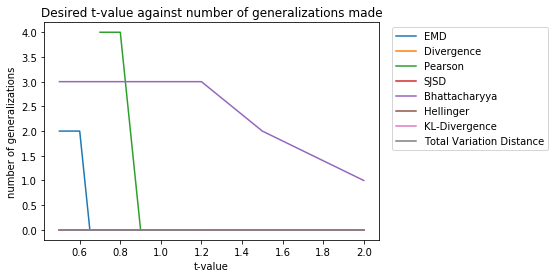

In [94]:
plt.plot(x, y_EMD, label='EMD')
plt.plot(x, y_div, label='Divergence')
plt.plot(x, y_pearson, label='Pearson')
plt.plot(x, y_sjsd, label='SJSD')
plt.plot(x, y_bhat, label='Bhattacharyya')
plt.plot(x, y_hell, label='Hellinger')
plt.plot(x, y_kl, label='KL-Divergence')
plt.plot(x, y_total, label='Total Variation Distance')
plt.title("Desired t-value against number of generalizations made")
plt.xlabel("t-value")
plt.ylabel("number of generalizations")
plt.legend(loc='upper right', bbox_to_anchor=(1.52, 1))

plt.show()

In [152]:
### Graphing rangeplots

y_EMD = np.array([score[0] for score in generalization_scores[0]])
y_div = np.array([score[0] for score in generalization_scores[1]])
y_pearson = np.array([score[0] for score in generalization_scores[2]])
y_sjsd = np.array([score[0] for score in generalization_scores[3]])
y_bhat = np.array([score[0] for score in generalization_scores[4]])
y_hell = np.array([score[0] for score in generalization_scores[5]])
y_kl = np.array([score[0] for score in generalization_scores[6]])
y_total = np.array([score[0] for score in generalization_scores[7]])

data_y = pd.DataFrame(list(zip(y_EMD, y_div, y_pearson, y_sjsd, y_bhat, y_hell, y_kl, y_total)), 
                     columns=['EMD', 'Divergence', 'Pearson', 'SJSD', 'Bhattacharyya', 'Hellinger', 'KL-Divergence', 
                           'Total Variation'])
data_y

,EMD,Divergence,Pearson,SJSD,Bhattacharyya,Hellinger,KL-Divergence,Total Variation
0,0.613747,2.033529,0.884890,0.930690,2.336788,0.485472,0.118588,0.391857
1,0.613747,2.182854,1.307355,1.018216,1.874659,0.168493,0.346999,0.391857
2,0.613747,2.258678,0.884890,0.951505,2.336788,0.354081,0.144063,0.391857
3,0.613747,2.094703,0.930567,0.938771,2.336788,0.485472,0.118588,0.391857
4,0.613747,2.079224,0.912347,0.974716,2.336788,0.485472,0.206285,0.391857
5,0.386253,2.032212,1.130757,1.019047,1.393327,0.158792,0.373516,0.391857
6,0.540444,2.476092,1.179090,1.018310,1.821978,0.139869,0.373516,0.391857
7,0.613747,2.135371,1.692749,1.019107,1.874659,0.168493,0.437808,0.391857
8,0.613747,2.258678,0.884890,0.951505,2.336788,0.354081,0.166851,0.391857
9,0.613747,2.307106,0.884890,0.992482,2.336788,0.328852,0.254548,0.391857


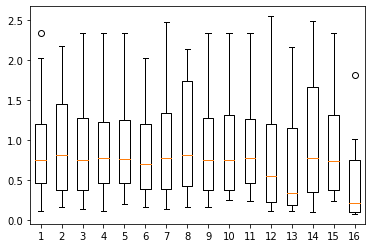

In [153]:
# plt.boxplot(y_EMD, labels=['EMD'])
# plt.boxplot(y_div, labels=['Divergence'])
# plt.boxplot(y_pearson, labels=['Pearson'])
# plt.boxplot(y_sjsd, labels=['SJSD'])
# plt.boxplot(y_bhat, labels=['Bhattacharyya'])
# plt.boxplot(y_hell, labels=['Hellinger'])
# plt.boxplot(y_kl, labels=['KL-Divergence'])
# plt.boxplot(y_total, labels=['Total Variation Distance'])

plt.boxplot(data_y)
plt.show()

In [154]:
import seaborn as sns

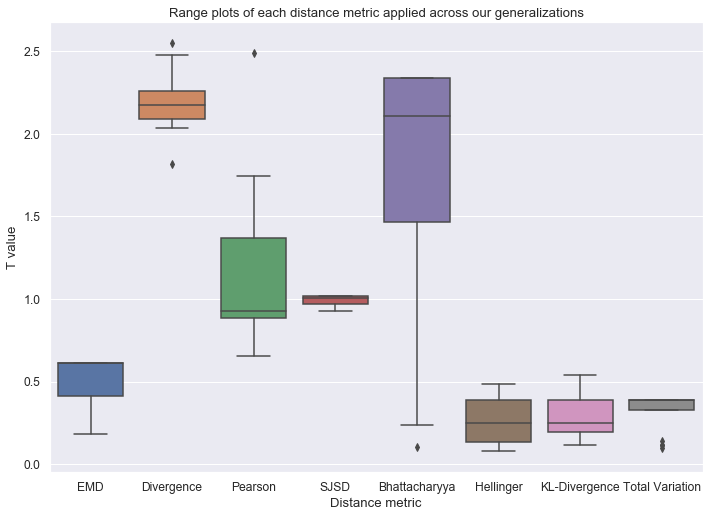

In [168]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x="variable", y="value", data=pd.melt(data_y))
ax.set(xlabel='Distance metric', ylabel='T value', 
       title="Range plots of each distance metric applied across our generalizations")
plt.show()